<a href="https://colab.research.google.com/github/WestonMadeira1/HW_2/blob/main/HW2(2a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
file_path = '/content/drive/My Drive/ML Data/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [209]:
housing.shape

(545, 13)

In [210]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [211]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [212]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [226]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [227]:
varlist_1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']
df_train = df_train[varlist_1]
df_train.head

<bound method NDFrame.head of         price      area  bedrooms  bathrooms   stories   parking
22   0.596970  0.432609       0.4   0.000000  0.000000  0.333333
41   0.527273  0.314954       0.4   0.333333  1.000000  0.000000
91   0.404242  0.342105       0.2   0.000000  0.000000  0.666667
118  0.363636  0.319131       0.4   0.000000  0.000000  0.000000
472  0.109091  0.124896       0.6   0.000000  0.333333  1.000000
..        ...       ...       ...        ...       ...       ...
526  0.048485  0.093567       0.2   0.000000  0.000000  0.000000
53   0.484848  0.230716       0.4   0.333333  1.000000  0.666667
350  0.175758  0.110276       0.2   0.000000  0.333333  0.333333
79   0.424242  0.289891       0.4   0.333333  0.666667  0.000000
520  0.060606  0.408243       0.2   0.000000  0.000000  0.000000

[436 rows x 6 columns]>

In [228]:
df_test = df_test[varlist_1]
df_test.head

<bound method NDFrame.head of         price      area  bedrooms  bathrooms   stories   parking
265  0.248485  0.088172  0.333333        0.0  0.333333  0.000000
54   0.531987  0.311828  0.333333        0.5  0.333333  0.333333
171  0.329966  0.617849  0.333333        0.0  0.000000  0.333333
244  0.262626  0.263082  0.333333        0.0  0.333333  0.000000
268  0.246465  0.236559  0.666667        0.0  0.333333  0.000000
..        ...       ...       ...        ...       ...       ...
451  0.127946  0.365591  0.000000        0.0  0.000000  0.000000
320  0.215488  0.191398  0.333333        0.0  0.333333  0.666667
424  0.148148  0.103943  0.333333        0.0  0.333333  0.000000
338  0.198653  0.152688  0.000000        0.0  0.333333  0.000000
373  0.175084  0.096774  0.000000        0.0  0.333333  0.000000

[109 rows x 6 columns]>

In [229]:
X_1 = df_train.values[:,1]
X_2 = df_train.values[:,2]
X_3 = df_train.values[:,3]
X_4 = df_train.values[:,4]
X_5 = df_train.values[:,5]

Y_T = df_train.values[:,0]

T_1 = df_test.values[:,1]
T_2 = df_test.values[:,2]
T_3 = df_test.values[:,3]
T_4 = df_test.values[:,4]
T_5 = df_test.values[:,5]

Y_V = df_test.values[:,0]

m = len(Y_T)
n = len(Y_V)

print('X1 = ', X_1[:5])
print('X2 = ', X_2[:5])
print('X3 = ', X_3[:5])
print('X4 = ', X_4[:5])
print('X5 = ', X_5[:5])
print('Y Train = ', Y_T[:5])
print('m = ', m)
print('n = ', n)

X1 =  [0.4326093  0.31495405 0.34210526 0.31913116 0.12489557]
X2 =  [0.4 0.4 0.2 0.4 0.6]
X3 =  [0.         0.33333333 0.         0.         0.        ]
X4 =  [0.         1.         0.         0.         0.33333333]
X5 =  [0.33333333 0.         0.66666667 0.         1.        ]
Y Train =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091]
m =  436
n =  109


In [230]:
X1 = X_1.reshape(m, 1)
print(X1[:10])
X2 = X_2.reshape(m, 1)
print(X2[:10])
X3 = X_3.reshape(m, 1)
print(X3[:10])
X4 = X_4.reshape(m, 1)
print(X4[:10])
X5 = X_5.reshape(m, 1)
print(X5[:10])


T1 = T_1.reshape(n,1)
T2 = T_2.reshape(n,1)
T3 = T_3.reshape(n,1)
T4 = T_4.reshape(n,1)
T5 = T_5.reshape(n,1)



X0 = np.ones((m, 1))
X0[:5]
T0 = np.ones((n,1))

[[0.4326093 ]
 [0.31495405]
 [0.34210526]
 [0.31913116]
 [0.12489557]
 [0.14021164]
 [0.49596213]
 [0.446533  ]
 [0.08103592]
 [0.15288221]]
[[0.4]
 [0.4]
 [0.2]
 [0.4]
 [0.6]
 [0.2]
 [0.6]
 [0.4]
 [0.4]
 [0.2]]
[[0.        ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.33333333]
 [0.        ]]
[[0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.33333333]
 [0.        ]]
[[0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [231]:
X_T = np.hstack((X0, X1, X2, X3, X4, X5,))
print(X_T[:10])
X_V = np.hstack((T0, T1, T2, T3, T4, T5,))

[[1.         0.4326093  0.4        0.         0.         0.33333333]
 [1.         0.31495405 0.4        0.33333333 1.         0.        ]
 [1.         0.34210526 0.2        0.         0.         0.66666667]
 [1.         0.31913116 0.4        0.         0.         0.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.        ]
 [1.         0.14021164 0.2        0.         0.         0.        ]
 [1.         0.49596213 0.6        1.         1.         1.        ]
 [1.         0.446533   0.4        0.         0.         0.        ]
 [1.         0.08103592 0.4        0.33333333 0.33333333 0.        ]
 [1.         0.15288221 0.2        0.         0.         0.        ]]


In [232]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [233]:
def compute_cost(X,Y,theta):
   predictions = X.dot(theta)
   errors = np.subtract(predictions, Y)
   sqrErrors = np.square(errors)
   J = 1 / (2 * m) * np.sum(sqrErrors)
   return J

In [234]:
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)  # Number of training examples
    loss_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        #cost_history[i] = compute_cost(X, Y, theta)
        loss = np.mean(np.square(errors))
        loss_history.append(loss)

    return theta, loss_history

In [239]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1100
alpha = 0.1

In [240]:
theta_t, loss_history_t = gradient_descent(X_T, Y_T, theta, alpha, iterations)
print('Final value of theta for training =', theta_t)

Final value of theta for training = [0.05836569 0.38056945 0.06731131 0.31454148 0.13750746 0.09633246]


In [241]:
theta_v, loss_history_v = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta for validation =', theta_v)

Final value of theta for validation = [0.05243514 0.33889397 0.11518197 0.09949161 0.18471551 0.19055189]


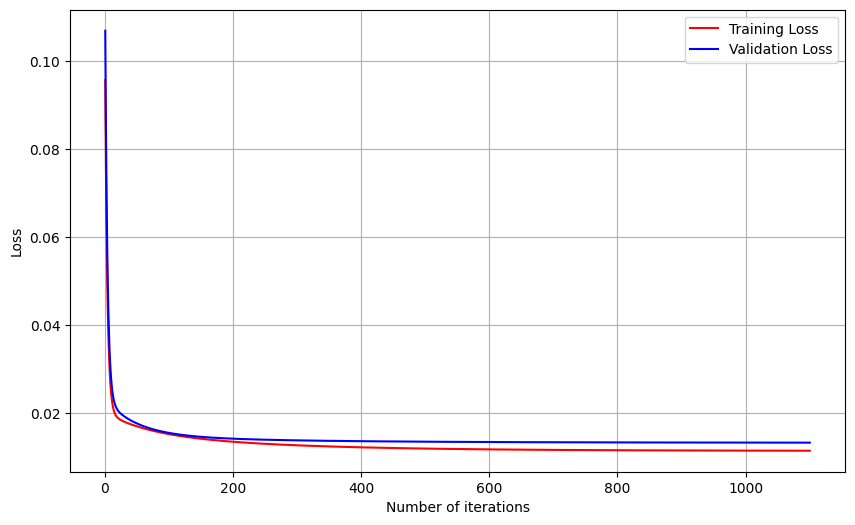

In [242]:
plt.plot(range(1, iterations + 1), loss_history_t, color='red', label='Training Loss')
plt.plot(range(1, iterations + 1),loss_history_v, color='blue', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.legend()
#plt.title('Convergence of gradient descent')

# Show the plot
plt.show()